In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import DBSCAN

%matplotlib inline

# Basic EDA

In [3]:
df=pd.read_csv('Merged Data/GRADUATION_WITH_CENSUS.csv', sep=',', encoding='latin-1')
df.shape
#this is a large dataset, so I will not be doing a pairplot to 
#complete exploratory analysis.

(9907, 580)

In [4]:
df.head()

,Unnamed: 0,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1,100005,ALABAMA,1,Albertville City,268,83.0,NaN,NaN,NaN,...,100.0,0.0,63.14,2.48,0.0,10.39,87.13,55.74,7.40,0.0
1,2,100006,ALABAMA,1,Marshall County,424,79.0,2.0,PS,1.0,...,100.0,0.0,63.27,3.52,0.0,17.02,79.45,56.31,6.96,0.0
2,3,100007,ALABAMA,1,Hoover City,1042,91.0,1.0,PS,71.0,...,100.0,0.0,81.77,1.97,0.0,2.98,95.06,81.77,0.00,0.0
3,4,100008,ALABAMA,1,Madison City,836,91.0,4.0,PS,44.0,...,100.0,0.0,67.06,4.38,0.0,6.99,88.63,58.64,8.42,0.0
4,5,100011,ALABAMA,1,Leeds City,117,72.0,NaN,NaN,NaN,...,100.0,0.0,60.84,3.82,0.0,17.87,78.31,53.11,7.73,0.0


In [129]:
df.columns;

In [5]:
df.dtypes.value_counts()

float64    509
int64       50
object      21
dtype: int64

In [6]:
df.info;

In [7]:
df.isnull().sum().sort_values();

# It looks like we have a lot of Data Cleaning to do...

In [70]:
#using my own sme, I am going to replace my cohort null values with '0' instead
#I am also going to focus on the columns with a lot of missing values first...

In [8]:
df_clean = pd.read_csv('grad_rates_clean.csv')

In [9]:
df_clean['MAM_COHORT_1112'].fillna(0, inplace=True)
df_clean['MAM_COHORT_1112'].dtype

dtype('float64')

In [10]:
df_clean['LEP_COHORT_1112'].fillna(0, inplace=True)
df_clean['MAS_COHORT_1112'].fillna(0, inplace=True) 
df_clean['MBL_COHORT_1112'].fillna(0, inplace=True)
df_clean['MHI_COHORT_1112'].fillna(0, inplace=True)
df_clean['MTR_COHORT_1112'].fillna(0, inplace=True)
df_clean['LEP_COHORT_1112'].astype(int, inplace=True) 
df_clean['MAS_COHORT_1112'].astype(int, inplace=True) 
df_clean['MBL_COHORT_1112'].astype(int, inplace=True) 
df_clean['MHI_COHORT_1112'].astype(int, inplace=True)
df_clean['MTR_COHORT_1112'].astype(int, inplace=True)
#These values still have 'NA' which cannot convert to integers...

0       0
1       0
2       5
3       2
4       0
5       1
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      1
16      4
17      0
18      0
19      1
20      2
21      1
22      0
23      0
24      0
25      2
26      0
27      0
28      1
29      0
       ..
9877    5
9878    0
9879    0
9880    0
9881    0
9882    5
9883    0
9884    2
9885    0
9886    0
9887    0
9888    0
9889    0
9890    0
9891    6
9892    1
9893    0
9894    1
9895    6
9896    3
9897    2
9898    0
9899    1
9900    4
9901    0
9902    1
9903    0
9904    3
9905    0
9906    0
Name: MTR_COHORT_1112, dtype: int64

In [136]:
#Here I was experimenting with other ways to change the values
#values = {'MTR_COHORT_1112':0, 'LEP_COHORT_1112':0, 'MAS_COHORT_1112':0, 'MBL_COHORT_1112':0, 'MHI_COHORT_1112':0}
#df_clean.fillna(value=values)

In [11]:
#I want to find exactly how many columns have null values:
df_clean.isnull().any().value_counts()

True     517
False     63
dtype: int64

In [75]:
#I want to isolate the columns which contain a null as their own dataframe 
#so then I can merge them together later.


#null_columns=df_clean.columns[df.isnull().any()]
#null_df_clean=pd.DataFrame(null_columns)
#null_df_clean=null_df.apply(string_parser)
#I cannot get the parser to work...

In [76]:
#Since there are a lot of null values, but only 11 that have significant values.

In [139]:
df_clean.isnull().any().value_counts

<bound method IndexOpsMixin.value_counts of Unnamed: 0                          False
leaid11                             False
STNAM                               False
FIPST                               False
leanm11                             False
ALL_COHORT_1112                     False
ALL_RATE_1112                        True
MAM_COHORT_1112                     False
MAM_RATE_1112                        True
MAS_COHORT_1112                     False
MAS_RATE_1112                        True
MBL_COHORT_1112                     False
MBL_RATE_1112                        True
MHI_COHORT_1112                     False
MHI_RATE_1112                        True
MTR_COHORT_1112                     False
MTR_RATE_1112                        True
MWH_COHORT_1112                      True
MWH_RATE_1112                        True
CWD_COHORT_1112                      True
CWD_RATE_1112                        True
ECD_COHORT_1112                      True
ECD_RATE_1112                   

In [12]:
#This is a function that Josh posted in the slack channel to get the columns to return 
#appropriate strings.

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        pass
    try:
        import unicodedata
        unicodedata.numeric(s)
        return True
    except (TypeError, ValueError):
        pass
 
    return False

def string_parser(string):
    if isinstance(string, int) or isinstance(string, float):
        return float(string)
    if len(string)==5:
        return (int(string[3:])-2) #pick the middle number if given about range
    if len(string)==2 and is_number(string):
        return int(string)
    if string[:2] == 'GE' or string[:2] == 'GT':
        return int(string[2:4]) + 1
    if string[:2] == 'LE' or string[:2] == 'LT':
        return int(string[2:4]) - 1
    else:
        return 0

In [13]:
#Here I am going to run through the column MTR_COHORT and see if I can fill all of the null
#values with better measures.
df_clean['MTR_COHORT_1112'].apply(string_parser)
df_clean['MTR_COHORT_1112'].fillna(0, inplace=True)
df_clean['MTR_COHORT_1112'].isnull().sum()

0

In [14]:
df_clean['MAM_RATE_1112'].apply(string_parser)
df_clean['MAM_RATE_1112'].fillna(0, inplace=True)

In [15]:
df_clean['MAM_RATE_1112'].apply(string_parser)
df_clean['MAM_RATE_1112'].fillna(0, inplace=True)
df_clean['MBL_RATE_1112'].apply(string_parser)
df_clean['MBL_RATE_1112'].fillna(0, inplace=True)
df_clean['MAS_RATE_1112'].apply(string_parser)
df_clean['MAS_RATE_1112'].fillna(0, inplace=True)
df_clean['MHI_RATE_1112'].apply(string_parser)
df_clean['MHI_RATE_1112'].fillna(0, inplace=True)
df_clean['MTR_RATE_1112'].apply(string_parser)
df_clean['MTR_RATE_1112'].fillna(0, inplace=True)
df_clean['MWH_RATE_1112'].apply(string_parser)
df_clean['MWH_RATE_1112'].fillna(0, inplace=True)
df_clean['CWD_RATE_1112'].apply(string_parser)
df_clean['CWD_RATE_1112'].fillna(0, inplace=True)
df_clean['ECD_RATE_1112'].apply(string_parser)
df_clean['ECD_RATE_1112'].fillna(0, inplace=True)
df_clean.select_dtypes(include=['object'])

,STNAM,leanm11,MAM_RATE_1112,MAS_RATE_1112,MBL_RATE_1112,MHI_RATE_1112,MTR_RATE_1112,MWH_RATE_1112,CWD_RATE_1112,ECD_RATE_1112,School.District,State_name,County_name
0,ALABAMA,Albertville City,0,0,GE50,60-69,0,85-89,60-79,70-74,Albertville City School District,Alabama,Marshall County
1,ALABAMA,Marshall County,PS,PS,PS,60-79,0,79.00,70-74,70-74,Marshall County School District,Alabama,Marshall County
2,ALABAMA,Hoover City,PS,85-89,85-89,60-69,PS,94.00,70-74,75-79,Hoover City School District,Alabama,Jefferson County
3,ALABAMA,Madison City,PS,GE90,85-89,60-79,PS,93.00,60-64,80-84,Madison City School District,Alabama,Madison County
4,ALABAMA,Leeds City,0,0,60-69,GE50,0,75-79,60-79,65-69,Leeds City School District,Alabama,Jefferson County
5,ALABAMA,Boaz City,0,PS,PS,GE50,PS,90-94,GE50,85-89,Boaz City School District,Alabama,Marshall County
6,ALABAMA,Trussville City,PS,PS,GE90,PS,0,90-94,40-59,80-89,Trussville City School District,Alabama,Jefferson County
7,ALABAMA,Alexander City,PS,PS,70-74,LT50,0,80-84,60-69,70-74,Alexander City City School District,Alabama,Tallapoosa County
8,ALABAMA,Andalusia City,0,PS,60-69,0,0,80-84,PS,60-69,Andalusia City School District,Alabama,Covington County
9,ALABAMA,Anniston City,0,0,65-69,PS,0,PS,40-59,65-69,Anniston City School District,Alabama,Calhoun County


In [16]:
df_clean.fillna(0, inplace=True)

In [17]:
df_clean

,Unnamed: 0,leaid11,STNAM,FIPST,leanm11,ALL_COHORT_1112,ALL_RATE_1112,MAM_COHORT_1112,MAM_RATE_1112,MAS_COHORT_1112,...,pct_TEA_MailOutMailBack_CEN_2010,pct_TEA_Update_Leave_CEN_2010,pct_Census_Mail_Returns_CEN_2010,pct_Vacant_CEN_2010,pct_Deletes_CEN_2010,pct_Census_UAA_CEN_2010,pct_Mailback_Count_CEN_2010,pct_FRST_FRMS_CEN_2010,pct_RPLCMNT_FRMS_CEN_2010,pct_BILQ_Mailout_count_CEN_2010
0,1.0,100005.0,ALABAMA,1.0,Albertville City,268.0,83.0,0.0,0,0.0,...,100.00,0.00,63.14,2.48,0.00,10.39,87.13,55.74,7.40,0.0
1,2.0,100006.0,ALABAMA,1.0,Marshall County,424.0,79.0,2.0,PS,1.0,...,100.00,0.00,63.27,3.52,0.00,17.02,79.45,56.31,6.96,0.0
2,3.0,100007.0,ALABAMA,1.0,Hoover City,1042.0,91.0,1.0,PS,71.0,...,100.00,0.00,81.77,1.97,0.00,2.98,95.06,81.77,0.00,0.0
3,4.0,100008.0,ALABAMA,1.0,Madison City,836.0,91.0,4.0,PS,44.0,...,100.00,0.00,67.06,4.38,0.00,6.99,88.63,58.64,8.42,0.0
4,5.0,100011.0,ALABAMA,1.0,Leeds City,117.0,72.0,0.0,0,0.0,...,100.00,0.00,60.84,3.82,0.00,17.87,78.31,53.11,7.73,0.0
5,6.0,100012.0,ALABAMA,1.0,Boaz City,155.0,92.0,0.0,0,3.0,...,100.00,0.00,67.43,2.33,0.00,9.33,88.33,67.38,0.05,0.0
6,7.0,100013.0,ALABAMA,1.0,Trussville City,300.0,93.0,1.0,PS,2.0,...,100.00,0.00,77.01,1.64,0.00,3.84,94.52,77.01,0.00,0.0
7,8.0,100030.0,ALABAMA,1.0,Alexander City,289.0,78.0,1.0,PS,4.0,...,85.79,14.21,62.33,9.15,0.49,13.03,77.33,57.14,5.19,0.0
8,9.0,100060.0,ALABAMA,1.0,Andalusia City,109.0,77.0,0.0,0,1.0,...,80.38,19.62,52.68,5.14,0.84,23.40,70.62,47.11,5.56,0.0
9,10.0,100090.0,ALABAMA,1.0,Anniston City,207.0,65.0,0.0,0,0.0,...,100.00,0.00,61.55,5.48,0.00,16.73,77.80,54.39,7.16,0.0


In [159]:
#Now I am going to build a function to run the entire sequence above with all of the columns
#X.apply(string_parser)

## Getting rid of the special characters...

In [83]:
#My error in lasso said I could not convert '$37,173,417' to a float
#df = df.replace('\$,','')
#I had to convert this df to a csv and use excel to clean this data point...

In [18]:
df.to_csv('grad_rate.csv', index=False)

# Lasso regression to identify key features

In [37]:
#df.index[df['$37,173,417']].tolist()

In [43]:
#My error in lasso said I could not convert '$37,173,417' to a float
#df = df.replace('\$,','')
#I had to convert this df to a csv and use excel to clean this data point...

In [19]:
df_clean.columns

Index(['Unnamed: 0', 'leaid11', 'STNAM', 'FIPST', 'leanm11', 'ALL_COHORT_1112',
       'ALL_RATE_1112', 'MAM_COHORT_1112', 'MAM_RATE_1112', 'MAS_COHORT_1112',
       ...
       'pct_TEA_MailOutMailBack_CEN_2010', 'pct_TEA_Update_Leave_CEN_2010',
       'pct_Census_Mail_Returns_CEN_2010', 'pct_Vacant_CEN_2010',
       'pct_Deletes_CEN_2010', 'pct_Census_UAA_CEN_2010',
       'pct_Mailback_Count_CEN_2010', 'pct_FRST_FRMS_CEN_2010',
       'pct_RPLCMNT_FRMS_CEN_2010', 'pct_BILQ_Mailout_count_CEN_2010'],
      dtype='object', length=580)

In [111]:
#df_clean.drop(['County_name', 'State_name', 'School.District', 'MAM_RATE_1112', 'MBL_RATE_1112', 'MAS_RATE_1112', 'MHI_RATE_1112', 'MTR_RATE_1112', 'MWH_RATE_1112', 'CWD_RATE_1112'], axis=1, inplace=True)

In [20]:
df_clean.columns[32:]

Index(['State_name', 'County.1', 'County_name', 'Tract', 'Flag',
       'Num_BGs_in_Tract', 'LAND_AREA', 'AIAN_LAND',
       'URBANIZED_AREA_POP_CEN_2010', 'URBAN_CLUSTER_POP_CEN_2010',
       ...
       'pct_TEA_MailOutMailBack_CEN_2010', 'pct_TEA_Update_Leave_CEN_2010',
       'pct_Census_Mail_Returns_CEN_2010', 'pct_Vacant_CEN_2010',
       'pct_Deletes_CEN_2010', 'pct_Census_UAA_CEN_2010',
       'pct_Mailback_Count_CEN_2010', 'pct_FRST_FRMS_CEN_2010',
       'pct_RPLCMNT_FRMS_CEN_2010', 'pct_BILQ_Mailout_count_CEN_2010'],
      dtype='object', length=548)

In [21]:
#I regretfully declare that I was not able to clean the individual 
#cohorts and rates.
X = df_clean[df_clean.columns[38:]]
X.shape

(9907, 542)

In [165]:
y=df_clean['ALL_RATE_1112']
ss = StandardScaler()
X_s = ss.fit_transform(X)

In [167]:
y= df_clean['ALL_RATE_1112']
optimal_lasso = LassoCV(n_alphas=500, cv=100, verbose=1)
optimal_lasso.fit(X_s, y)

............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................/opt/conda/l

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=None, copy_X=True, cv=100, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=500, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=1)

In [174]:
lasso = Lasso(alpha=optimal_lasso.alpha_)

lasso_score = cross_val_score(lasso, X_s, y, cv=10)

lasso.fit(X_s, y)

Lasso_coefs = pd.DataFrame({
        'coef':lasso.coef_,
        'variable':X.columns,
        #'abs_coef':np.abs(lasso.coef_)
    })
Lasso_coefs.sort_values('coef', ascending=False, inplace=True)
Lasso_coefs.head(10)

,coef,variable
38,1.397009,NH_White_alone_CEN_2010
539,1.072356,pct_FRST_FRMS_CEN_2010
532,0.839170,pct_TEA_MailOutMailBack_CEN_2010
268,0.579286,Med_House_value_ACS_08_12
145,0.388775,College_ACSMOE_08_12
236,0.047549,Aggregate_HH_INC_ACSMOE_08_12
171,0.005676,Civ_emp_45_64_ACSMOE_08_12
397,-0.000000,pct_Age5p_Laotian_ACS_08_12
369,-0.000000,pct_Age5p_OthSlavic_ACS_08_12
368,-0.000000,pct_Age5p_SRBCroati_ACSMOE_08_12


In [175]:
Lasso_coefs.tail(10)

,coef,variable
322,-0.195827,pct_NH_Blk_alone_CEN_2010
502,-0.218349,pct_PUB_ASST_INC_ACS_08_12
508,-0.281808,pct_Vacant_Units_ACS_08_12
288,-0.332182,pct_RURAL_POP_CEN_2010
326,-0.373696,pct_NH_AIAN_alone_ACS_08_12
285,-0.470335,Low_Response_Score
0,-0.655925,LAND_AREA
1,-0.695545,AIAN_LAND
528,-0.845597,pct_No_Plumb_ACS_08_12
535,-1.059435,pct_Vacant_CEN_2010


In [177]:
print(lasso_score.mean())

0.160381856466


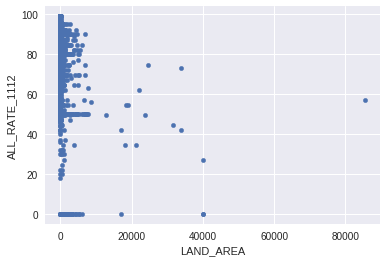

In [213]:
df_clean.plot(kind='scatter', x ='LAND_AREA', y='ALL_RATE_1112')
#try bringing this up in tableau.

In [227]:
df_clean.to_csv('df_clean_project3', index = False)

In [225]:
#do a DBscan here:
#db_X, db_y = df_clean['LAND_AREA'], df_clean['ALL_RATE_1112']
#dbscan        =  DBSCAN(eps=0.3, min_samples=5).fit(db_X)
#core_samples  =  dbscan.core_sample_indices_
#labels        =  dbscan.labels_

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [226]:
labels

array([-1])

# Random Forest Exploration

 - Since I have run a Lasso regression and I have identified features with high coefficients, I am going to use them to run a random forest model.

In [179]:
features_df = df_clean[['NH_White_alone_CEN_2010', 'pct_FRST_FRMS_CEN_2010', 'pct_TEA_MailOutMailBack_CEN_2010', 'Med_House_value_ACS_08_12', 'College_ACSMOE_08_12', 'pct_Vacant_CEN_2010', 'pct_No_Plumb_ACS_08_12', 'AIAN_LAND', 'LAND_AREA', 'Low_Response_Score', 'pct_NH_AIAN_alone_ACS_08_12']]

In [186]:
rf = RandomForestRegressor(random_state=42)
rf_params ={
    'n_estimators': [5, 10, 15, 20, 25],
    'max_depth': [None, 1, 2, 3],
    'max_features': ['auto', 'log2']
}
gs_rf = GridSearchCV(rf, rf_params)
gs_rf.fit(features_df, y)
print(gs_rf.best_score_)
gs_rf.best_params_

0.199376673043


{'max_depth': 3, 'max_features': 'auto', 'n_estimators': 15}

In [24]:
X = df_clean[df_clean.columns[38:]]
y= df_clean['ALL_RATE_1112']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [34]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

In [35]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(importances,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
LAND_AREA,0.211
pct_FRST_FRMS_CEN_2010,0.021
pct_Census_Mail_Returns_CEN_2010,0.015
NH_White_alone_ACS_08_12,0.014
Med_HHD_Inc_ACS_08_12,0.010
pct_NH_Blk_alone_CEN_2010,0.010
pct_Mobile_Homes_ACSMOE_08_12,0.008
pct_Age5p_French_ACSMOE_08_12,0.007
pct_NH_AIAN_alone_CEN_2010,0.007


In [211]:
importances

,importance
feature,
LAND_AREA,0.300
pct_FRST_FRMS_CEN_2010,0.116
NH_White_alone_CEN_2010,0.103
Med_House_value_ACS_08_12,0.096
Low_Response_Score,0.094
pct_No_Plumb_ACS_08_12,0.074
College_ACSMOE_08_12,0.073
pct_Vacant_CEN_2010,0.064
pct_NH_AIAN_alone_ACS_08_12,0.055


# Data Visualization: